In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

!pip install --quiet lazypredict
from lazypredict.Supervised import LazyClassifier

import seaborn as sns
import matplotlib.pyplot as plt

import joblib
import random
from IPython.display import display, Markdown

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/Crop_recommendation.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.88,82.00,6.50,202.94,rice
1,85,58,41,21.77,80.32,7.04,226.66,rice
2,60,55,44,23.00,82.32,7.84,263.96,rice
3,74,35,40,26.49,80.16,6.98,242.86,rice
4,78,42,42,20.13,81.60,7.63,262.72,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.77,66.41,6.78,177.77,coffee
2196,99,15,27,27.42,56.64,6.09,127.92,coffee
2197,118,33,30,24.13,67.23,6.36,173.32,coffee
2198,117,32,34,26.27,52.13,6.76,127.18,coffee


In [ ]:
crop_suitability_attributes = pd.read_csv('/content/Crop_recommendation.csv')
crop_suitability_attributes

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.88,82.00,6.50,202.94,rice
1,85,58,41,21.77,80.32,7.04,226.66,rice
2,60,55,44,23.00,82.32,7.84,263.96,rice
3,74,35,40,26.49,80.16,6.98,242.86,rice
4,78,42,42,20.13,81.60,7.63,262.72,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.77,66.41,6.78,177.77,coffee
2196,99,15,27,27.42,56.64,6.09,127.92,coffee
2197,118,33,30,24.13,67.23,6.36,173.32,coffee
2198,117,32,34,26.27,52.13,6.76,127.18,coffee


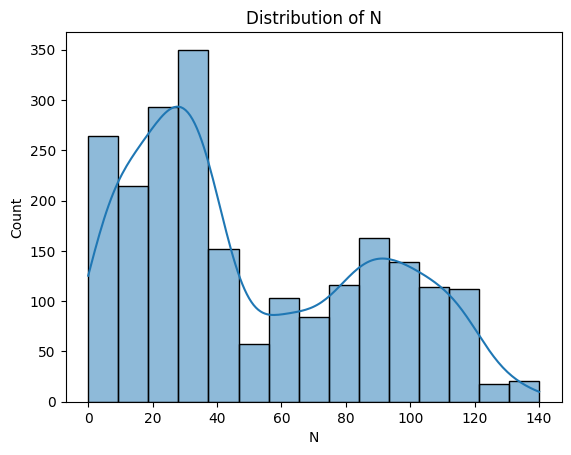

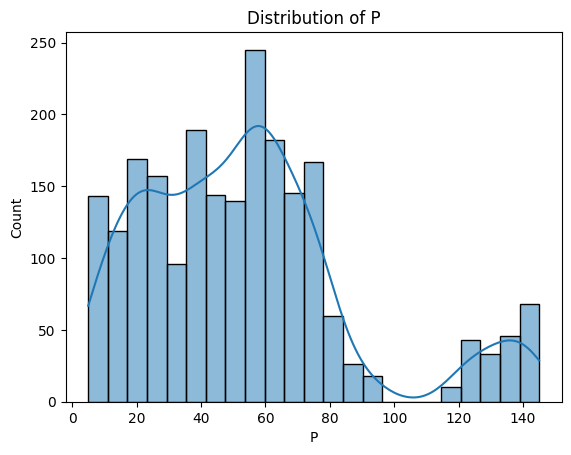

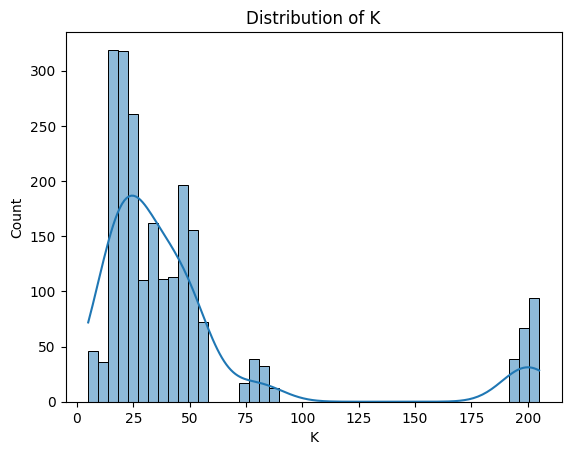

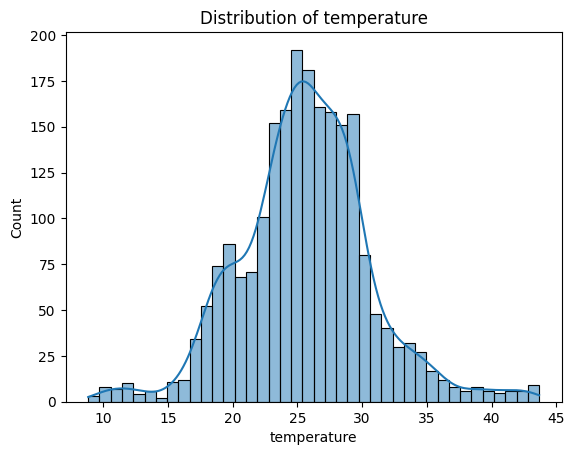

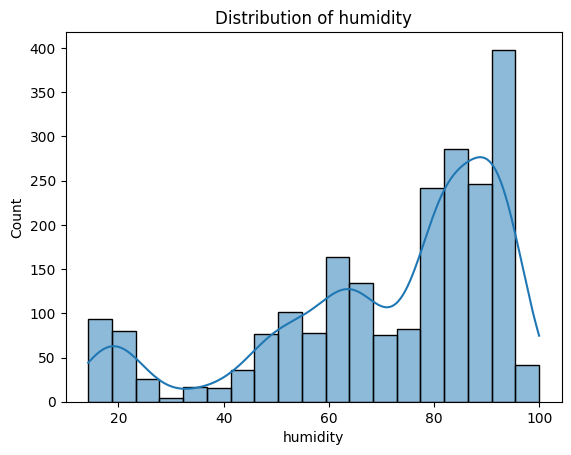

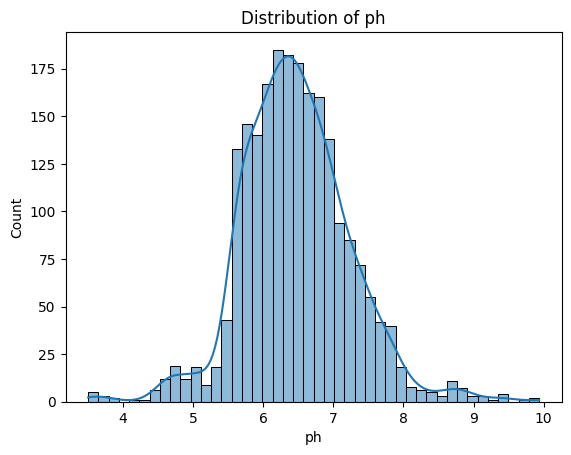

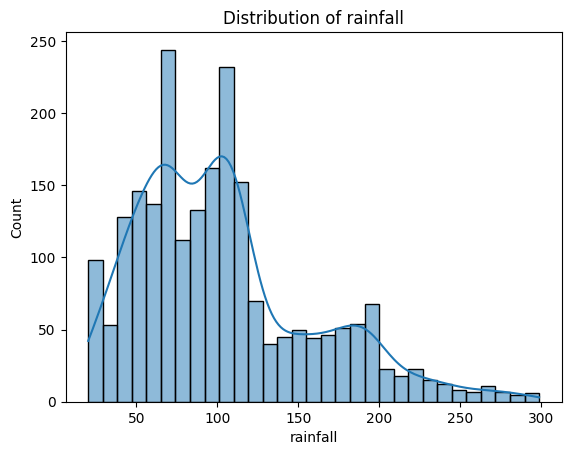

In [ ]:
for col in crop_suitability_attributes.drop('label', axis = 1).columns.tolist():
    sns.histplot(crop_suitability_attributes[col], kde = True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [ ]:
crop_suitability_attributes['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
proper_name_mapping = {
    'rice': 'Rice',
    'maize': 'Maize (Corn)',
    'chickpea': 'Chickpea',
    'kidneybeans': 'Kidney Beans',
    'pigeonpeas': 'Pigeon Peas',
    'mothbeans': 'Moth Beans',
    'mungbean': 'Mung Bean',
    'blackgram': 'Black Gram',
    'lentil': 'Lentil',
    'pomegranate': 'Pomegranate',
    'banana': 'Banana',
    'mango': 'Mango',
    'grapes': 'Grapes',
    'watermelon': 'Watermelon',
    'muskmelon': 'Muskmelon',
    'apple': 'Apple',
    'orange': 'Orange',
    'papaya': 'Papaya',
    'coconut': 'Coconut',
    'cotton': 'Cotton',
    'jute': 'Jute',
    'coffee': 'Coffee'
}

crop_suitability_attributes['label'] = crop_suitability_attributes['label'].map(proper_name_mapping)
crop_suitability_attributes

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.88,82.00,6.50,202.94,Rice
1,85,58,41,21.77,80.32,7.04,226.66,Rice
2,60,55,44,23.00,82.32,7.84,263.96,Rice
3,74,35,40,26.49,80.16,6.98,242.86,Rice
4,78,42,42,20.13,81.60,7.63,262.72,Rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.77,66.41,6.78,177.77,Coffee
2196,99,15,27,27.42,56.64,6.09,127.92,Coffee
2197,118,33,30,24.13,67.23,6.36,173.32,Coffee
2198,117,32,34,26.27,52.13,6.76,127.18,Coffee


In [ ]:
label_encoder = LabelEncoder()
crop_suitability_attributes['label'] = label_encoder.fit_transform(crop_suitability_attributes['label'])
crop_suitability_attributes

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.88,82.00,6.50,202.94,20
1,85,58,41,21.77,80.32,7.04,226.66,20
2,60,55,44,23.00,82.32,7.84,263.96,20
3,74,35,40,26.49,80.16,6.98,242.86,20
4,78,42,42,20.13,81.60,7.63,262.72,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.77,66.41,6.78,177.77,5
2196,99,15,27,27.42,56.64,6.09,127.92,5
2197,118,33,30,24.13,67.23,6.36,173.32,5
2198,117,32,34,26.27,52.13,6.76,127.18,5


In [ ]:
def evaluateLazyClassifiers(data, features_for_classification):
    features = data.drop(features_for_classification, axis = 1)
    targets = data[features_for_classification]
    features_train, features_test, targets_train, targets_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)

    lazyClassifier = LazyClassifier(verbose = 0, ignore_warnings = True, custom_metric = None)
    models, predictions = lazyClassifier.fit(features_train, features_test, targets_train, targets_test)
    return models, features_train, features_test, targets_train, targets_test

In [ ]:
models, features_train, features_test, targets_train, targets_test = evaluateLazyClassifiers(crop_suitability_attributes, ['label'])

 97%|█████████▋| 31/32 [00:07<00:00,  6.48it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000530 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1339
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 7
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.169004
[LightGBM] [Info] Start training from score -3.182610
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.018722
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -2.984433
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.078620
[LightGBM] 

100%|██████████| 32/32 [00:08<00:00,  3.66it/s]


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,1.00,1.00,None,1.00,0.06
RandomForestClassifier,0.99,0.99,None,0.99,0.78
QuadraticDiscriminantAnalysis,0.99,0.99,None,0.99,0.06
BaggingClassifier,0.99,0.99,None,0.99,0.32
ExtraTreesClassifier,0.99,0.99,None,0.99,0.69
XGBClassifier,0.99,0.99,None,0.99,0.53
DecisionTreeClassifier,0.99,0.99,None,0.99,0.07
LGBMClassifier,0.99,0.99,None,0.99,1.27
LabelPropagation,0.97,0.97,None,0.97,0.40


In [ ]:
gnb = GaussianNB()
gnb.fit(features_train, targets_train)

targets_pred = gnb.predict(features_test)

In [ ]:
print("Accuracy:", accuracy_score(targets_test, targets_pred))
print("Classification Report:\n", classification_report(targets_test, targets_pred, target_names = label_encoder.classes_))

Accuracy: 0.9954545454545455
Classification Report:
               precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        23
      Banana       1.00      1.00      1.00        21
  Black Gram       1.00      1.00      1.00        20
    Chickpea       1.00      1.00      1.00        26
     Coconut       1.00      1.00      1.00        27
      Coffee       1.00      1.00      1.00        17
      Cotton       1.00      1.00      1.00        17
      Grapes       1.00      1.00      1.00        14
        Jute       0.92      1.00      0.96        23
Kidney Beans       1.00      1.00      1.00        20
      Lentil       1.00      1.00      1.00        11
Maize (Corn)       1.00      1.00      1.00        21
       Mango       1.00      1.00      1.00        19
  Moth Beans       1.00      1.00      1.00        24
   Mung Bean       1.00      1.00      1.00        19
   Muskmelon       1.00      1.00      1.00        17
      Orange       1.00     

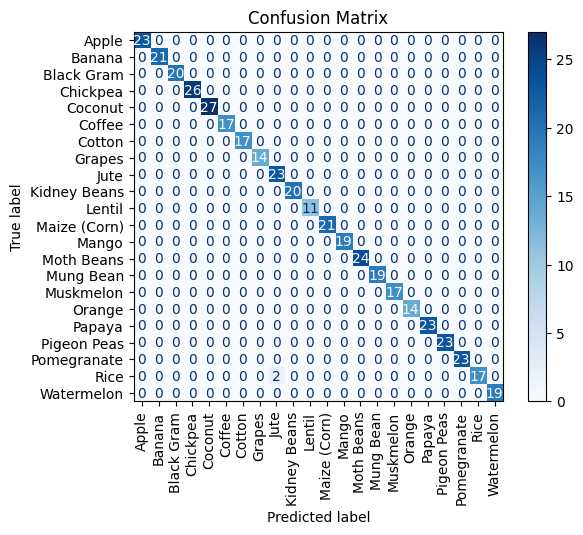

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(targets_test, targets_pred), display_labels = label_encoder.classes_)

disp.plot(cmap = 'Blues')
plt.title("Confusion Matrix")
plt.xticks(rotation = 90)
plt.show()


In [ ]:
cv_scores = cross_val_score(GaussianNB(), features_test, targets_test, cv = 5)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.98863636 0.98863636 0.97727273 1.         1.        ]
Mean CV Accuracy: 0.990909090909091


In [ ]:
joblib.dump(gnb, "gaussiannb_crop_model.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

['label_encoder.pkl']

In [ ]:
model = joblib.load("gaussiannb_crop_model.pkl")
label_encoder = joblib.load("label_encoder.pkl")

In [ ]:
def generate_random_values():
    N = round(random.uniform(0, 150), 5)
    P = round(random.uniform(0, 150), 5)
    K = round(random.uniform(0, 200), 5)
    temperature = round(random.uniform(0, 45), 5)
    humidity = round(random.uniform(15, 100), 5)
    ph = round(random.uniform(3, 10), 5)
    rainfall = round(random.uniform(20, 300), 5)

    return N, P, K, temperature, humidity, ph, rainfall

In [ ]:
emoji_mapping = {
    'N': ('🌿', 'N (Nitrogen ratio)'),
    'P': ('⚡', 'P (Phosphorous ratio)'),
    'K': ('💧', 'K (Potassium ratio)'),
    'temperature': ('🌡️', '°C (Temperature in Celsius)'),
    'humidity': ('💧', '% (Humidity)'),
    'ph': ('🔬', 'pH (Soil pH value)'),
    'rainfall': ('🌧️', 'mm (Rainfall in mm)')
    }

def print_attributes(N, P, K, temperature, humidity, ph, rainfall):
    display(Markdown(f"{emoji_mapping['N'][0]} **Nitrogen**: *{N} {emoji_mapping['N'][1]}*"))
    display(Markdown(f"{emoji_mapping['P'][0]} **Phosphorous**: *{P} {emoji_mapping['P'][1]}*"))
    display(Markdown(f"{emoji_mapping['K'][0]} **Potassium**: *{K} {emoji_mapping['K'][1]}*"))
    display(Markdown(f"{emoji_mapping['temperature'][0]} **Temperature**: *{temperature} {emoji_mapping['temperature'][1]}*"))
    display(Markdown(f"{emoji_mapping['humidity'][0]} **Humidity**: *{humidity} {emoji_mapping['humidity'][1]}*"))
    display(Markdown(f"{emoji_mapping['ph'][0]} **pH**: {ph} *{emoji_mapping['ph'][1]}*"))
    display(Markdown(f"{emoji_mapping['rainfall'][0]} **Rainfall**: *{rainfall} {emoji_mapping['rainfall'][1]}*"))

In [ ]:
crop_emoji_mapping = {
    'Rice': '🌾',
    'Maize (Corn)': '🌽',
    'Chickpea': '🫘',
    'Kidney Beans': '🫘',
    'Pigeon Peas': '🫘',
    'Moth Beans': '🫘',
    'Mung Bean': '🫘',
    'Black Gram': '🫘',
    'Lentil': '🫘',
    'Pomegranate': '🍎',
    'Banana': '🍌',
    'Mango': '🥭',
    'Grapes': '🍇',
    'Watermelon': '🍉',
    'Muskmelon': '🍈',
    'Apple': '🍎',
    'Orange': '🍊',
    'Papaya': '🥭',
    'Coconut': '🥥',
    'Cotton': '🌱',
    'Jute': '🪢',
    'Coffee': '☕'
}


def predict_crop(N, P, K, temperature, humidity, ph, rainfall):
    features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    prediction = model.predict(features)
    crop_name = label_encoder.inverse_transform(prediction)[0]

    display(Markdown(f"The most suitable crop for agriculture in the given conditions is: {crop_emoji_mapping[crop_name]} **{crop_name}** {crop_emoji_mapping[crop_name]}."))


In [ ]:
def crop_recommendation_pipeline(i):
    display(Markdown(f"### Crop Recommendation {i + 1}"))
    N, P, K, temperature, humidity, ph, rainfall = generate_random_values()
    print_attributes(N, P, K, temperature, humidity, ph, rainfall)
    print()
    predict_crop(N, P, K, temperature, humidity, ph, rainfall)
    print()

In [ ]:
import random

for i in range(3):  # Generate 3 different recommendations
    N = round(random.uniform(0, 150), 5)  # Random Nitrogen value
    P = round(random.uniform(0, 150), 5)  # Random Phosphorus value
    K = round(random.uniform(0, 200), 5)  # Random Potassium value
    temperature = round(random.uniform(0, 45), 5)  # Temperature in Celsius
    humidity = round(random.uniform(15, 100), 5)  # Humidity in %
    ph = round(random.uniform(3, 10), 5)  # Soil pH
    rainfall = round(random.uniform(20, 300), 5)  # Rainfall in mm

    # crop_recommendation_pipeline(i, N, P, K, temperature, humidity, ph, rainfall)










In [ ]:
for i in range(2):
    crop_recommendation_pipeline(i)

### Crop Recommendation 1

🌿 **Nitrogen**: *126.81686 N (Nitrogen ratio)*

⚡ **Phosphorous**: *135.35644 P (Phosphorous ratio)*

💧 **Potassium**: *25.0693 K (Potassium ratio)*

🌡️ **Temperature**: *5.64479 °C (Temperature in Celsius)*

💧 **Humidity**: *87.9529 % (Humidity)*

🔬 **pH**: 6.66578 *pH (Soil pH value)*

🌧️ **Rainfall**: *131.35583 mm (Rainfall in mm)*

The most suitable crop for agriculture in the given conditions is: 🌽 **Maize (Corn)** 🌽.

### Crop Recommendation 2

🌿 **Nitrogen**: *55.78778 N (Nitrogen ratio)*

⚡ **Phosphorous**: *5.06115 P (Phosphorous ratio)*

💧 **Potassium**: *79.6664 K (Potassium ratio)*

🌡️ **Temperature**: *4.25405 °C (Temperature in Celsius)*

💧 **Humidity**: *46.23058 % (Humidity)*

🔬 **pH**: 8.75551 *pH (Soil pH value)*

🌧️ **Rainfall**: *77.22686 mm (Rainfall in mm)*

The most suitable crop for agriculture in the given conditions is: 🥭 **Mango** 🥭.